In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
data=pd.read_csv('/content/Titanic dataset.csv')

In [52]:
data.shape

(418, 12)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [54]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [55]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [57]:
import missingno as msno

<Axes: >

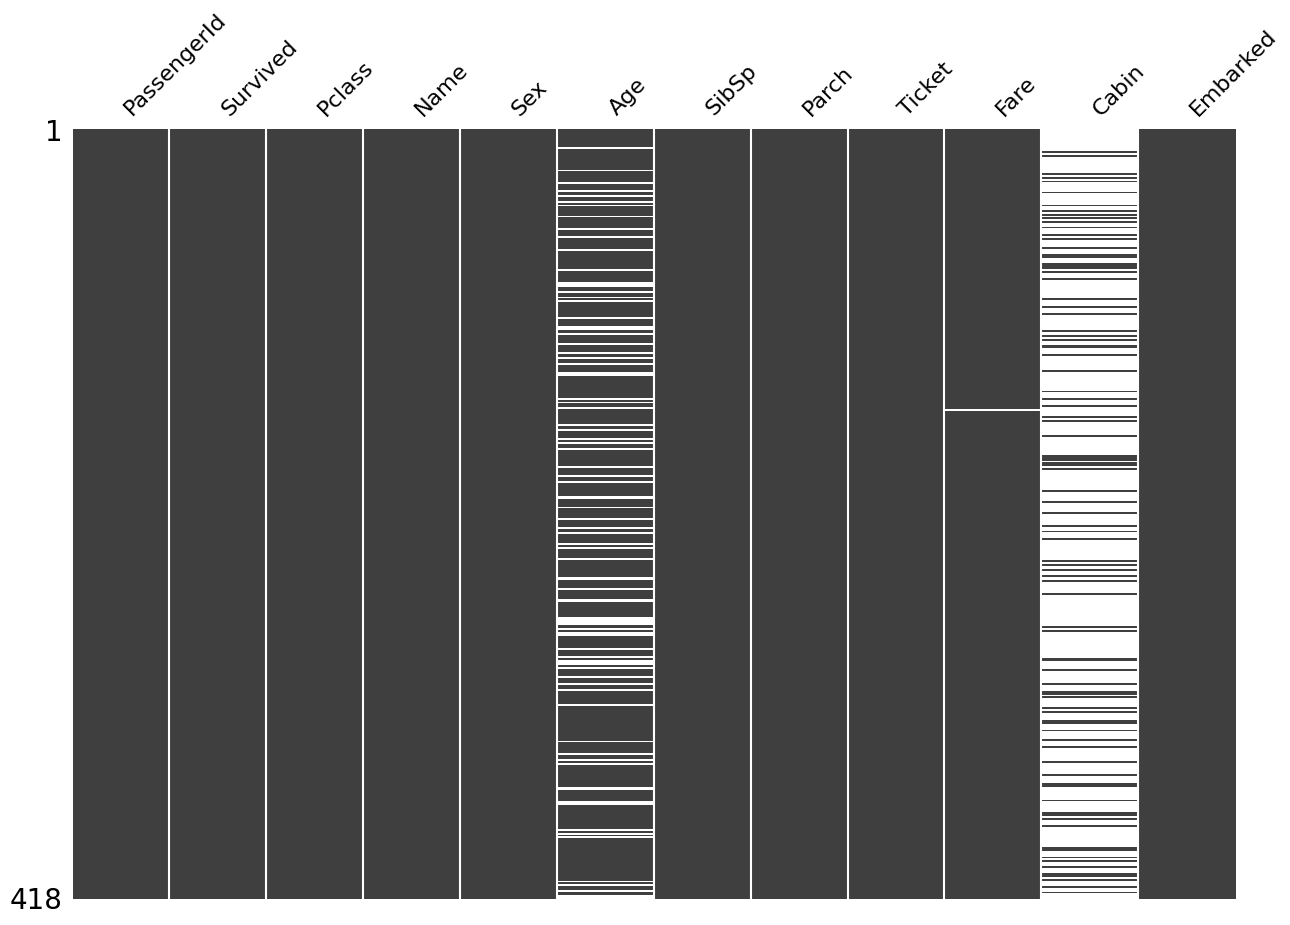

In [58]:
msno.matrix(data,figsize=(15,10),sparkline=False,p=0)

In [59]:
print("after handling missing values")
data.select_dtypes(include=(['int64','float64'])).isna().sum()
df_num_col=data.select_dtypes(include=(['int64','float64'])).columns
for c in df_num_col:
  data[c].fillna(data[c].mean(),inplace=True)
data.select_dtypes(include=(['int64','float64'])).isna().sum()

after handling missing values


PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [60]:
print("after handling missing values")
data.select_dtypes(include=(['object'])).isna().sum()
df_num_col=data.select_dtypes(include=(['object'])).columns
for c in df_num_col:
  data[c].fillna(data[c].mode().values[0],inplace=True)
data.select_dtypes(include=(['object'])).isna().sum()

after handling missing values


Name        0
Sex         0
Ticket      0
Cabin       0
Embarked    0
dtype: int64

<Axes: >

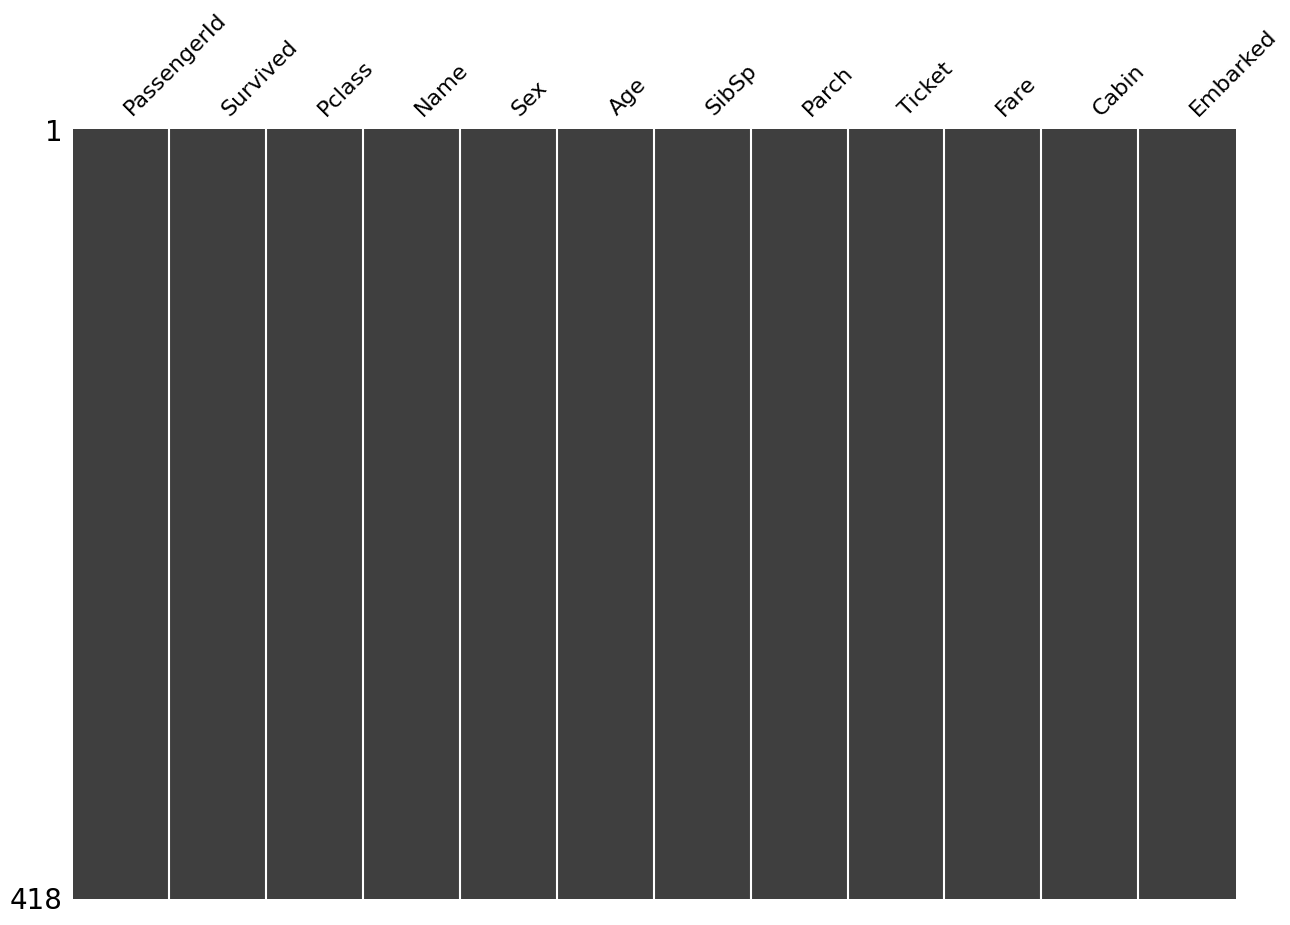

In [61]:
msno.matrix(data,figsize=(15,10),sparkline=False,p=0)

In [62]:

data['Survived'] = data['Survived'].astype('category')
data['Pclass'] = data['Pclass'].astype('category')


In [63]:
data.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.0,418.0,418,418,418.000000,418.000000,418.000000,418,418.000000,418,418
unique,NaN,2.0,3.0,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,0.0,3.0,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,266.0,218.0,1,266,NaN,NaN,NaN,5,NaN,330,270
mean,1100.500000,NaN,NaN,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,NaN,NaN,NaN,NaN,12.634534,0.896760,0.981429,NaN,55.840500,NaN,NaN
min,892.000000,NaN,NaN,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,NaN,NaN,NaN,NaN,23.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,NaN,NaN,NaN,NaN,30.272590,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,NaN,NaN,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN


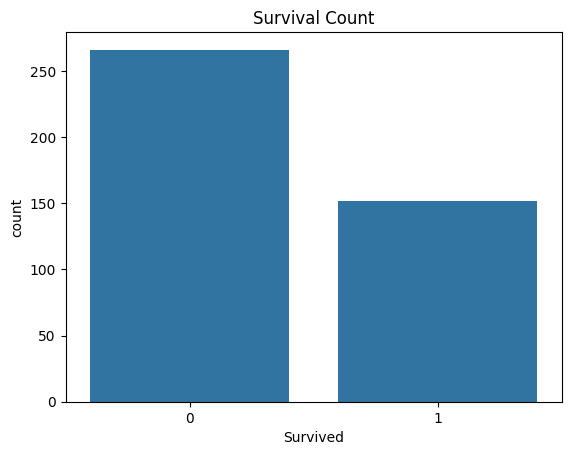

In [64]:
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()


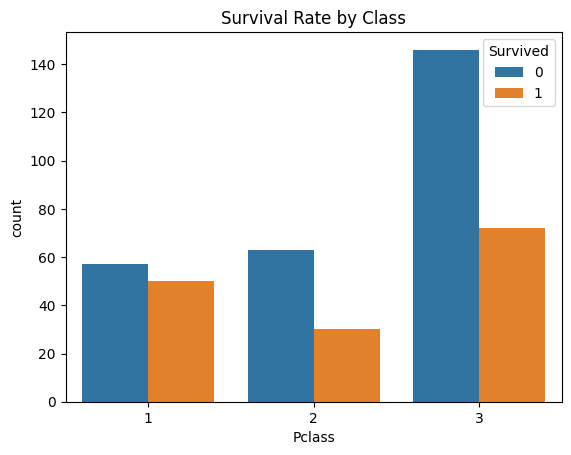

In [65]:
# Survival rate by class
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Rate by Class')
plt.show()


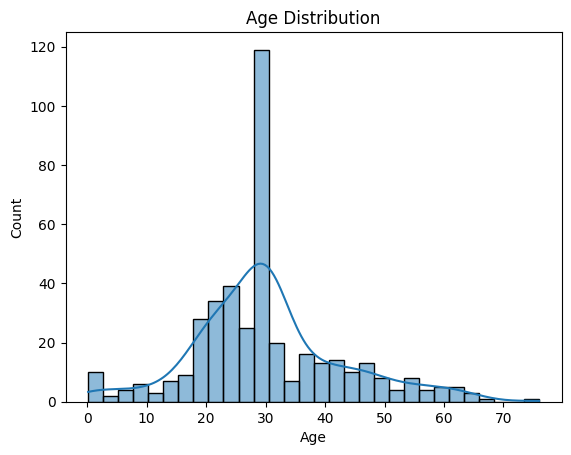

In [66]:
# Age distribution
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


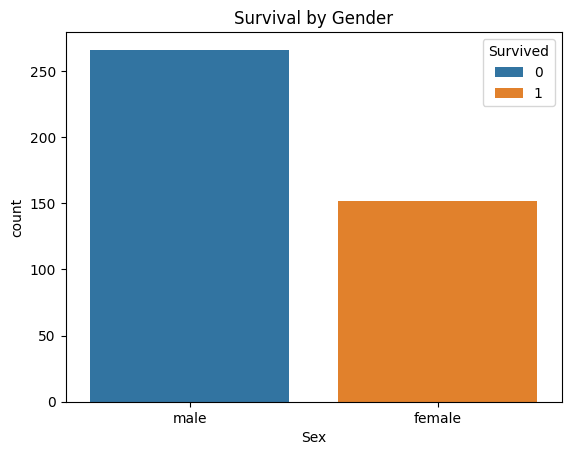

In [67]:
# Survival by gender
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Gender')
plt.show()


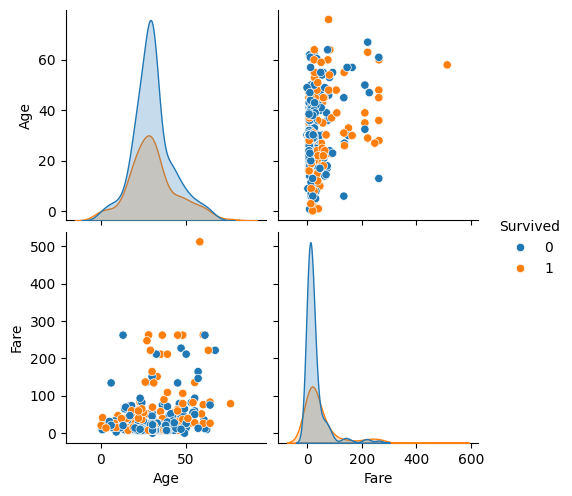

In [70]:
# Pair plot for numerical variables
sns.pairplot(data[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()
